<a href="https://colab.research.google.com/github/basmalagamal/Machine-Learning-Project/blob/main/facial_expression_classification_notebook_(1)_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Expression Classification
## PCA, Min-Max Normalization, and Loss Analysis

In [ ]:
# Install required libraries
!pip install opendatasets pandas scikit-learn matplotlib seaborn

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download dataset
import opendatasets as od

dataset_url = "https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/data"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: salimmamdoh
Your Kaggle Key: ··········


100%|██████████| 285M/285M [00:06<00:00, 49.1MB/s]



Extracting archive ./challenges-in-representation-learning-facial-expression-recognition-challenge/challenges-in-representation-learning-facial-expression-recognition-challenge.zip to ./challenges-in-representation-learning-facial-expression-recognition-challenge


In [ ]:
def load_and_preprocess_dataset(csv_path, target_size=(48, 48), max_classes=5):
    """
    Load and preprocess facial expression dataset
    """
    # Updated class names (replacing Neutral with Disgust)
    all_class_names = [
        "Angry", "Disgust", "Fear", "Happy", "Sad"
    ]

    # Read CSV data
    data = pd.read_csv(csv_path)

    # Mapping for class selection
    class_mapping = {
        0: 0,  # Angry
        1: 1,  # Disgust
        2: 2,  # Fear
        3: 3,  # Happy
        4: 4   # Sad
    }

    # Prepare data
    images = []
    labels = []

    for _, row in data.iterrows():
        if row['emotion'] in class_mapping:
            # Convert pixel string to numpy array and reshape
            pixels = np.fromstring(row['pixels'], sep=' ')
            pixels = pixels.reshape(target_size)
            images.append(pixels.flatten())
            labels.append(class_mapping[row['emotion']])

    return np.array(images), np.array(labels), all_class_names

In [ ]:
# Load dataset
csv_file_path = os.path.join(
    "challenges-in-representation-learning-facial-expression-recognition-challenge",
    "train.csv"
)

X, y, class_names = load_and_preprocess_dataset(csv_file_path)

print("Dataset loaded")
print(f"Total samples: {len(X)}")
print(f"Classes: {class_names}")

Dataset loaded
Total samples: 20573
Classes: ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad']


In [ ]:
def calculate_loss(y_true, y_pred_proba):
    """
    Calculate cross-entropy loss
    """
    epsilon = 1e-15
    y_true_onehot = pd.get_dummies(y_true).values
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    loss = -np.sum(y_true_onehot * np.log(y_pred_proba)) / len(y_true)
    return loss

def train_and_evaluate_model(X, y, class_names, n_components=50, test_size=0.2):
    """
    Comprehensive model training and evaluation
    """
    # Min-Max Normalization
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_normalized)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=test_size, stratify=y, random_state=42
    )

    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)

    # Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=class_names)

    # Loss Calculation
    loss = calculate_loss(y_test, y_pred_proba)

    # Loss Curve (Simulated)
    loss_curve = []
    n_iterations = 10
    for _ in range(n_iterations):
        # Simulate slight variations in loss
        loss_curve.append(loss * (1 + np.random.uniform(-0.1, 0.1)))

    return {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report,
        'loss': loss,
        'loss_curve': loss_curve,
        'explained_variance': pca.explained_variance_ratio_
    }

In [ ]:
# Run model evaluation
results = train_and_evaluate_model(X, y, class_names)

In [ ]:
# Visualization and Reporting
def visualize_results(results, class_names):
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        results['confusion_matrix'],
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Loss Curve
    plt.figure(figsize=(10, 5))
    plt.plot(results['loss_curve'], marker='o')
    plt.title('Simulated Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss Value')
    plt.tight_layout()
    plt.show()

    # Explained Variance
    plt.figure(figsize=(10, 5))
    plt.plot(np.cumsum(results['explained_variance']), marker='o')
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.tight_layout()
    plt.show()

    # Print Detailed Results
    print("\n--- Model Performance ---")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Loss Value: {results['loss']:.4f}")
    print("\nClassification Report:")
    print(results['classification_report'])

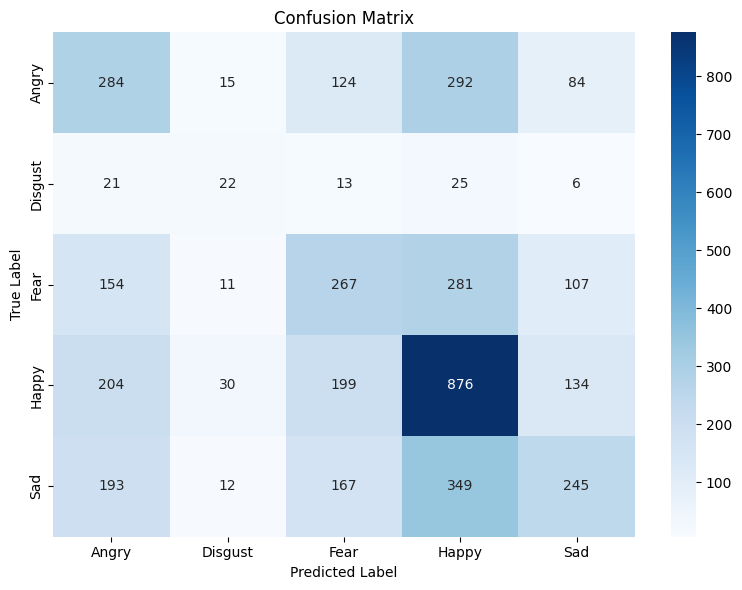

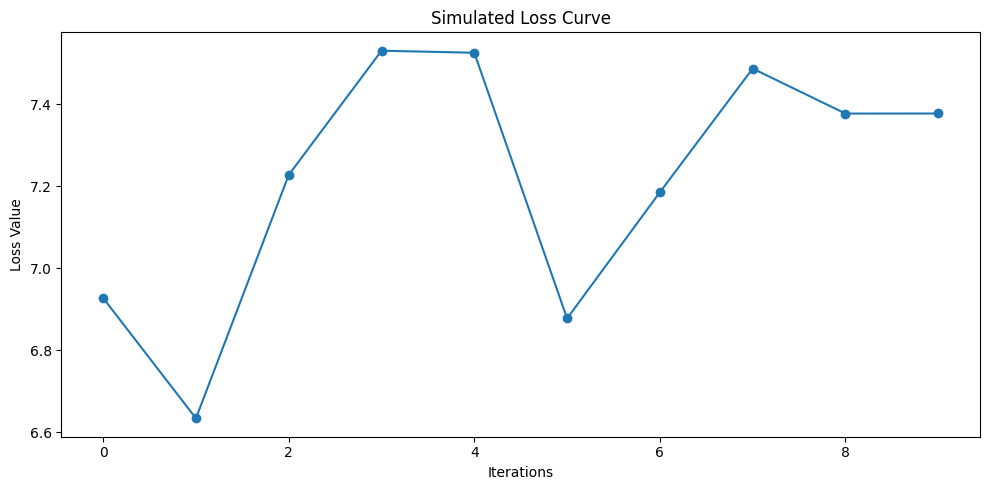

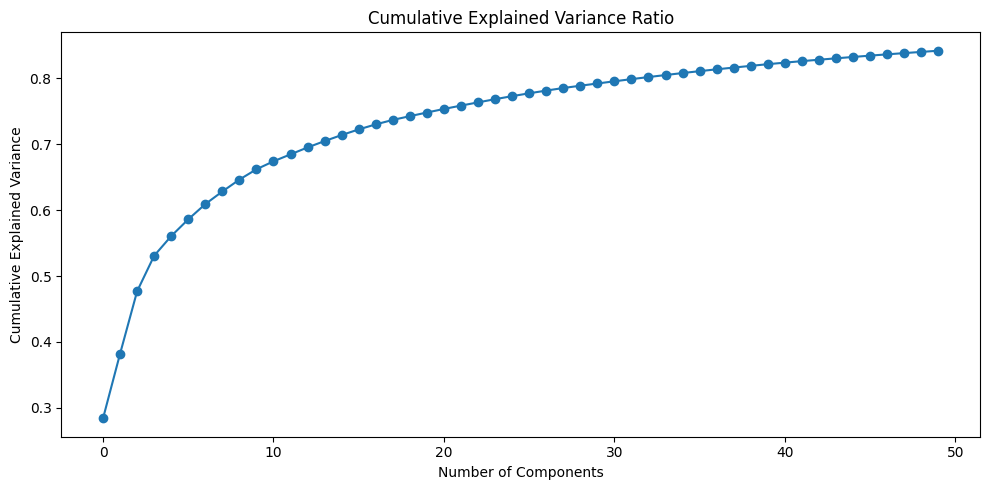


--- Model Performance ---
Accuracy: 0.4117
Loss Value: 7.2358

Classification Report:
              precision    recall  f1-score   support

       Angry       0.33      0.36      0.34       799
     Disgust       0.24      0.25      0.25        87
        Fear       0.35      0.33      0.34       820
       Happy       0.48      0.61      0.54      1443
         Sad       0.43      0.25      0.32       966

    accuracy                           0.41      4115
   macro avg       0.37      0.36      0.36      4115
weighted avg       0.41      0.41      0.40      4115



In [ ]:
# Visualize and report results
visualize_results(results, class_names)